* **numpy** se usa para manejar arrays y crear rangos de valores.

* **matplotlib**.pyplot se usa para graficar.

* **linprog** es el método principal para resolver problemas de programación lineal.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog


##Se definen los coeficientes y las restricciones

Esto representa el vector de coeficientes de la función objetivo que queremos minimizar:

𝑓
(
𝑥
,
𝑦
)
=
2
𝑥
+
3
𝑦

Nota: en scipy, se usa el formato de minimización, por lo que no es necesario cambiar el signo.


In [2]:
# Coeficientes de la función objetivo: Min z = 2x + 3y
c = [2, 3]

# Restricciones (Ax <= b)
# x + y <= 4
# 2x + y <= 5
A = [[1, 1],
     [2, 1]]
b = [4, 5]

# Variables >= 0
bounds = [(0, None), (0, None)]

In [3]:
# Resolver
res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')
print("Solución óptima:", res.x)
print("Valor mínimo:", res.fun)

Solución óptima: [0. 0.]
Valor mínimo: 0.0


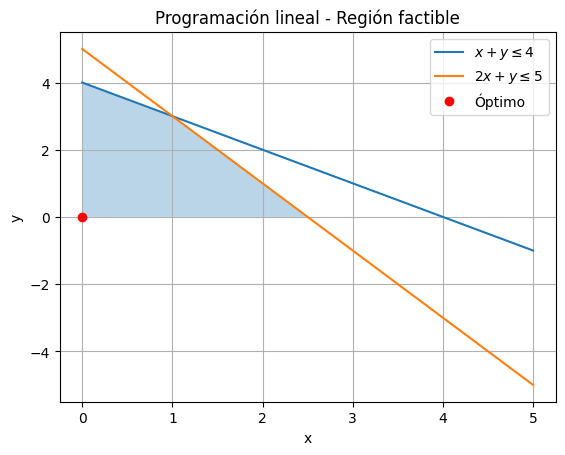

In [4]:
# Visualización del espacio factible
x = np.linspace(0, 5, 100)
y1 = 4 - x
y2 = 5 - 2*x

plt.plot(x, y1, label=r'$x + y \leq 4$')
plt.plot(x, y2, label=r'$2x + y \leq 5$')
plt.fill_between(x, 0, np.minimum(y1, y2), where=(y1>0)&(y2>0), alpha=0.3)

plt.plot(res.x[0], res.x[1], 'ro', label='Óptimo')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Programación lineal - Región factible")
plt.legend()
plt.grid()
plt.show()

##Ejemplo: Producción óptima de dos productos

Una empresa produce **Producto A** y **Producto B**. Cada uno requiere recursos limitados de **material** y **horas** de trabajo, y **genera una ganancia** por unidad vendida. El objetivo es **maximizar las ganancias**, respetando las restricciones de recursos.


| Recurso             | Producto A | Producto B | Disponibilidad |
| ------------------- | ---------- | ---------- | -------------- |
| Material (kg)       | 3          | 2          | 60 kg          |
| Horas de trabajo    | 2          | 4          | 80 horas       |
| Ganancia por unidad | \$40       | \$50       | —              |


💡 Formulación
Variables de decisión:

𝑥: cantidad de Producto A a producir

𝑦: cantidad de Producto B a producir

**Función objetivo (a maximizar):**

𝑓
(
𝑥
,
𝑦
)
=
40
𝑥
+
50
𝑦


**Restricciones:**

3
𝑥
+
2
𝑦
≤
60 (material)

2
𝑥
+
4
𝑦
≤
80 (horas de trabajo)

𝑥 > 0

𝑦 > 0

⚠️ Importante:
scipy.optimize.linprog solo minimiza, así que cambiamos de maximizar a minimizar el negativo de la función objetivo


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Negar los coeficientes de la función objetivo para convertir a minimización
c = [-40, -50]  # Maximizar 40x + 50y ≡ Minimizar -40x -50y

# Restricciones (Ax <= b)
A = [
    [3, 2],  # 3x + 2y <= 60 (material)
    [2, 4]   # 2x + 4y <= 80 (horas)
]
b = [60, 80]

# Restricciones de no negatividad estricta (>=0)
bounds = [(0.01, None), (0.01, None)]  # Evita soluciones con cero exacto

# Resolver el problema
res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')

# Resultados
x_opt, y_opt = res.x
profit = -res.fun  # recordar que maximizamos con signo negativo
print(f"Cantidad óptima de Producto A: {x_opt:.2f}")
print(f"Cantidad óptima de Producto B: {y_opt:.2f}")
print(f"Ganancia máxima: ${profit:.2f}")


Cantidad óptima de Producto A: 10.00
Cantidad óptima de Producto B: 15.00
Ganancia máxima: $1150.00


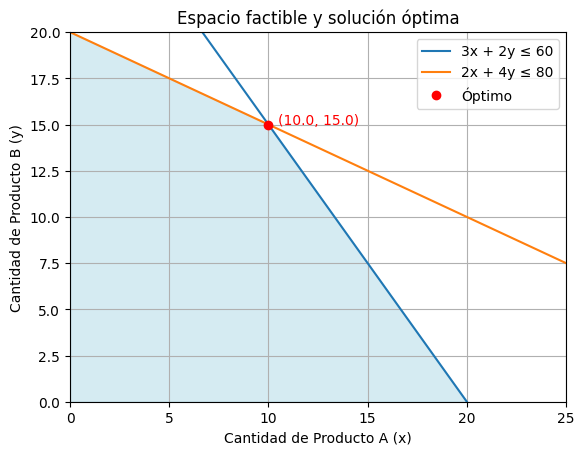

In [6]:
x = np.linspace(0, 25, 200)
y1 = (60 - 3*x) / 2    # Restricción material
y2 = (80 - 2*x) / 4    # Restricción horas

plt.plot(x, y1, label='3x + 2y ≤ 60')
plt.plot(x, y2, label='2x + 4y ≤ 80')

# Rellenar la región factible
plt.fill_between(x, 0, np.minimum(y1, y2), where=(y1 >= 0) & (y2 >= 0), color='lightblue', alpha=0.5)

# Graficar solución óptima
plt.plot(x_opt, y_opt, 'ro', label='Óptimo')
plt.text(x_opt + 0.5, y_opt, f'({x_opt:.1f}, {y_opt:.1f})', color='red')

plt.xlim(0, max(x))
plt.ylim(0, max(np.minimum(y1, y2)))
plt.xlabel('Cantidad de Producto A (x)')
plt.ylabel('Cantidad de Producto B (y)')
plt.title('Espacio factible y solución óptima')
plt.legend()
plt.grid()
plt.show()
